In [2]:
import numpy as np
from scipy.stats.stats import pearsonr
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time

from os.path import exists 
from GPbaseband1 import *
%pylab inline
#Using latex rendering:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)



/opt/python/2.7.10/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy


In [3]:
with open('interpulses.txt', 'r') as f:
    text = f.read()
    interpulses = text.split('\n')
    
with open('mainpulses.txt', 'r') as f:
    text = f.read()
    mainpulses = text.split('\n')

In [4]:
time_string1 = '2015-10-19T00:17:47.415' # S/N = 89!, main pulse 
time_string2 = '2015-10-19T02:35:26.143' # S/N = 43, main pulse 
time_string3 = '2015-10-19T02:06:52.280' #S/N = 7.9, inter pulse
time_string4 = '2015-10-19T02:06:58.031' #S/N = 9.6, main pulse, also a double pulse
time_string5 = '2015-10-19T00:55:15.557' #S/N = 8.33, main pulse
time_string6 = '2015-10-19T00:55:49.673' #S/N = 8.55, main pulse
time_string7 = '2015-10-19T01:29:52.509' #S/N = 8.44, main pulse
time_string8 = '2015-10-19T01:55:06.340' #S/N = 8.66, main pulse
time_string9 = '2015-10-19T02:13:46.551' #S/N = 9.56, main pulse
time_string10 = '2015-10-19T02:36:11.418'#S/N = 8.41, main pulse

time_string11 = '2015-10-19T00:54:59.880' # bright double pulse
time_string12 = '2015-10-19T02:36:46.815'  #bright double pulse2

time_string13 = '2015-10-19T00:37:14.418' # close main pulse pair
time_string14 = '2015-10-19T00:37:15.126'

time_string15 = '2015-10-19T01:57:05.107' # the closest main pulse pair 
time_string16 = '2015-10-19T01:57:05.410'

time_string17 = '2015-10-19T00:56:55.579' # close pair by 1.078s
time_string18 = '2015-10-19T00:56:54.501' 

time_string19 = '2015-10-19T02:17:06.664' #close pair by 1.281s
time_string20 = '2015-10-19T02:17:07.945' 

time_string21 = '2015-10-19T01:28:04.429' #close pair by 1.65
time_string22 = '2015-10-19T01:28:06.081' 

time_string23 = '2015-10-19T01:44:15.701' # close pair by 1.98
time_string24 = '2015-10-19T01:44:17.690' 

time_string25 = '2015-10-19T01:29:52.509' # close main pulse pair by 2.09
time_string26 = '2015-10-19T01:29:54.600' 

time_string27 = '2015-10-18T23:47:20.315' # close interpulse and main pulse pair (interpulse) by 0.49s
time_string28 = '2015-10-18T23:47:20.807' #main pulse for the above pair 

7.57612653424


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


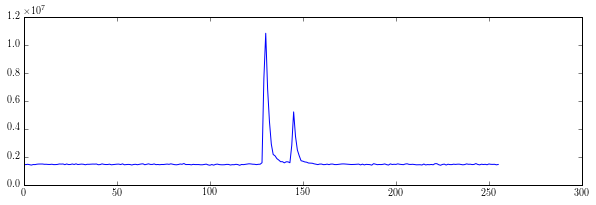

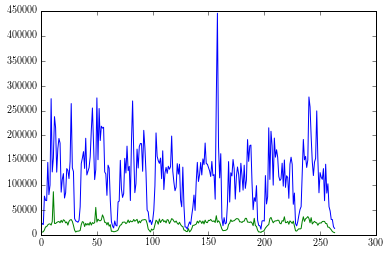

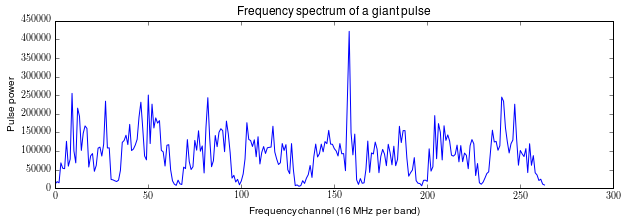

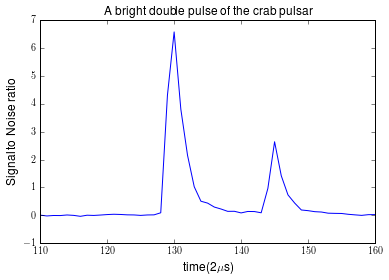

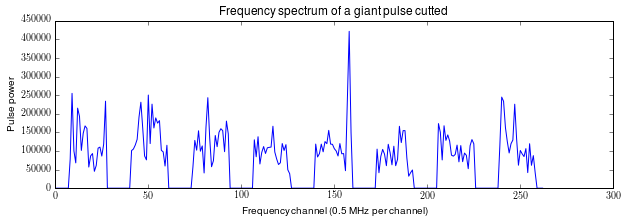

In [41]:
def get_SN(outputsumfreq):
    noise_std = np.std(outputsumfreq[:5]) 
    noise_mean = np.mean(outputsumfreq[:5])
    sigs_noise = (outputsumfreq-noise_mean)/noise_mean
    return sigs_noise

lower = 130
upper = 450
def process_freq_spec(gp1,nchan,draw=0):
    '''function takes a continuous frequency spectrum and cuts it into 8 bands, 
    then stitch the 8 bands together to compute a correlation coefficient. 
    function also plots the frequency spectrum if draw = 1'''
    gp1_8 = np.zeros((lower/512.*nchan))
    gp1_8=np.append(gp1_8,gp1[int(lower/512.*nchan):int(upper/512.*nchan)])
    gp1_s = gp1[int(lower/512.*nchan):int(upper/512.*nchan)] #stitched frequency spectrum used to find the correlation coefficient
    for j in range(7):
        gp1_8=np.append(gp1_8,np.zeros((264/8-(upper/512.*nchan-lower/512.*nchan))),0)
        gp1_8=np.append(gp1_8,gp1[(j+1)*(nchan+1)+int(lower/512.*nchan):(j+1)*(nchan+1)+int(upper/512.*nchan)],0)
        gp1_s=np.append(gp1_s,gp1[(j+1)*(nchan+1)+int(lower/512.*nchan):(j+1)*(nchan+1)+int(upper/512.*nchan)],0)
    gp1_8=np.append(gp1_8,np.zeros((264/8-upper/512.*nchan)),0)
    if nchan == 512:
        new1 = np.zeros((8,25))
        for i in range(8):
            for j in range(25):
                new1[i,j] = average(gp1_8[i,j*N:(j+1)*N])
        if draw:
            figure()
            plot(new1.ravel())
        return new1.ravel(),gp1_8.ravel()
    else:
        if draw:
            figure(figsize = (10,3))
            plot(gp1_8.ravel())
            xlabel('Frequency channel (0.5 MHz per channel)')
            ylabel('Pulse power')
            title('Frequency spectrum of a giant pulse cutted')
        return gp1_8.ravel(),gp1_s.ravel()

def load_gp(time_string,nchan,draw = 0):
    '''Takes in a time string, a string indicating whcih telescope to use, and an interger of nchan'''
#     output = np.load('./GPs/p{}.npy'.format(time_string))
    output = np.load('/mnt/raid-cita/xzxu/GPs/GPp1-{}/p{}.npy'.format(nchan,time_string))

    outputsumfreq = output.sum(0) 
    #computes signal to noise after summing all the frequencies
    sigs_noise = get_SN(outputsumfreq)
    
    peak_time = np.argmax(sigs_noise)
    S_N = outputsumfreq[peak_time]/np.mean(outputsumfreq[:5])
    

    if nchan == 512:
        background_std = []
        for j in range(8):
            background_std.append(output[j*(nchan+1)+lower/512.*nchan:j*(nchan+1)+upper/512.*nchan,:peak_time-3].std())
        output_pulse = output[:,peak_time]
#         print 'std2 =',background_std2
        background_freq = output[:,peak_time-3]

    if nchan == 128:
        sn_sorted = np.argsort(sigs_noise)
#         print sn_sorted
#         print sn_sorted.shape
        background_freq = (output[:,sn_sorted[30]]+output[:,sn_sorted[31]])/2
        output_pulse = (output[:,sn_sorted[-1]]+output[:,sn_sorted[-2]])/2
        background_std = []
        for j in range(8):
            background_std.append(background_freq[j*(nchan+1)+lower/512.*nchan:j*(nchan+1)+upper/512.*nchan].std())
            
    if nchan == 32:
        sn_sorted = np.argsort(sigs_noise)
#         background_freq = np.concatenate([np.array([output[:,sn_sorted[-k]]]) for k in range(50,55)],axis = 0).sum(0) 
        background_freq = output[:,31:35].sum(1)
        output_pulse = np.concatenate([np.array([output[:,sn_sorted[-k]]]) for k in range(1,5)],axis = 0).sum(0)
#         background_1 = output[:,sn_sorted[-51]]
#         output_pulse = output[:,sn_sorted[-1]]
        background_c = background_freq[int(lower/512.*nchan):int(upper/512.*nchan)]
        for j in range(1,8):
            background_c = np.concatenate((background_c,background_freq[int(j*(nchan+1)+lower/512.*nchan):int(j*(nchan+1)+upper/512.*nchan)]),axis = 0)
        background_std = np.std(background_c.ravel())
#         figure()
#         plot(background_c.ravel())
        
    if nchan == 16:
        sn_sorted = np.argsort(sigs_noise)
#         print sn_sorted
        background_1= np.concatenate([np.array([output[:,sn_sorted[-k]]]) for k in range(51,56)],axis = 0).sum(0) 
        output_pulse = np.concatenate([np.array([output[:,sn_sorted[-k]]]) for k in range(1,6)],axis = 0).sum(0)
#         background_1 = output[:,sn_sorted[-101]]
#         output_pulse = output[:,sn_sorted[-1]]
        background_std = np.std(background_1)
        background_freq = background_1
        
    freq_spec = output_pulse-background_freq
#     freq_spec = output_pulse
    
    
    if draw:
        figure(figsize = (10,3))
        plot(outputsumfreq)
        figure()
        plot(output_pulse)
        plot(background_freq)
        figure(figsize = (10,3))
        plot(freq_spec)
        xlabel('Frequency channel (16 MHz per band)')
        ylabel('Pulse power')
        title('Frequency spectrum of a giant pulse')
    return freq_spec,background_std,sigs_noise, S_N


nchan = 32

N = 16
time_string = time_string11
fs1,bgstd1,os1,sn1 = load_gp(time_string,nchan,draw = 1)
# fs2,bgstd2,os2,sn2 = load_gp(time_string,nchan,draw = 1)

figure()
plot(os1)
xlabel('time(2$\mu$s)',fontsize = 12)
ylabel('Signal to Noise ratio',fontsize = 12)
title('A bright double pulse of the crab pulsar')
xlim(110,160)
print sn1
fgp1n,fgp1 = process_freq_spec(fs1,nchan,draw = 1)
# fgp2n,fgp2 = process_freq_spec(fs2,nchan,draw = 1)


In [24]:
print np.zeros((264/8-(upper/512.*nchan-lower/512.*nchan))).shape

(13,)


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [37]:
def get_cc((fs1,bgstd1),(fs2,bgstd2)):
# def get_cc(fs1,fs2):
    mean1 = np.mean(fs1)
    mean2 = np.mean(fs2)
    numerator = np.mean((fs1-mean1)*(fs2-mean2))
    denominator = np.sqrt((np.std(fs1)**2-bgstd1**2)*(np.std(fs2)**2-bgstd2**2))
#     denominator = np.std(fs1)*np.std(fs2)
    return numerator/denominator
    
def get_ccs((fs1,bgstd1),(fs2,bgstd2)):
    coefficients= []
    for i in range(8):
        X = fs1[i]
        Y = fs2[i]
        Xbg = bgstd1[i]
        Ybg = bgstd2[i]
        coefficient = get_cc((X,Xbg),(Y,Ybg))
        coefficients.append(coefficient) 
    return np.mean(coefficients),coefficients

# get_cc(fgp1n,fgp2n)
# get_cc((fgp1n,bgstd1),(fgp2n,bgstd2))

In [7]:
colors = [(31, 119, 180),(255, 127, 14), (44, 160, 44),(148, 103, 189),(214, 39, 40)] #blue, orange, green, purple, red
for i in range(len(colors)):    
    r, g, b = colors[i]    
    colors[i] = (r / 255., g / 255., b / 255.) 

In [33]:
nchan = 32
N = 425/25 #N is how many points I average into 1 in process frequency function. 
ctvalues = np.zeros(shape = (0,2))
for i,time_string1 in enumerate(interpulses[:-1]):
    t_gp1 = Time(time_string1)
#     if exists('/home/ramain/GPs/GP{}/p{}.npy'.format('p',time_string1)): 
    if exists('/mnt/raid-cita/xzxu/GPs/GPp1-{}/p{}.npy'.format(nchan,time_string1)):
        fs1,bgstd1,os1,sn1 = load_gp(time_string1,nchan)
        if sn1<1.5:
            continue
        for j,time_string2 in enumerate(interpulses[i+1:-1]):
            t_gp2 = Time(time_string2)
            dt = t_gp2-t_gp1
            if abs(dt.sec)<1000:
                if abs(dt.sec)<1e-2:
                    print time_string1,time_string2
                if exists('/mnt/raid-cita/xzxu/GPs/GPp1-{}/p{}.npy'.format(nchan,time_string2)):
                    fs2,bgstd2,os2,sn2 = load_gp(time_string2,nchan)
                    if sn2<1.5:
                        continue 
                    fgp1,_ = process_freq_spec(fs1,nchan,draw = 0)
                    fgp2,_ = process_freq_spec(fs2,nchan,draw = 0)
#                     cc=get_cc(fgp1,fgp2)
                    cc = get_cc((fgp1,bgstd1),(fgp2,bgstd2))
                    ctvalues=np.append(ctvalues,np.array([[cc,abs(dt.sec)]]),axis = 0)

np.save('./figures/correlation_coeff/ctvalues_aug11_MP-IP-32-n.npy',ctvalues)


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


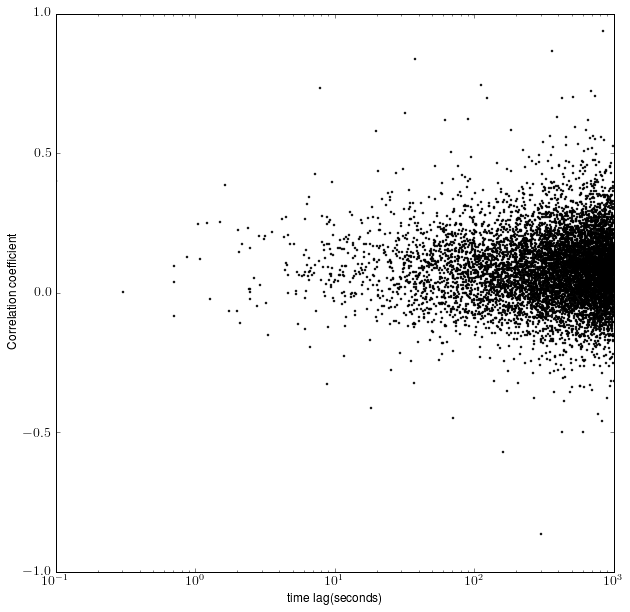

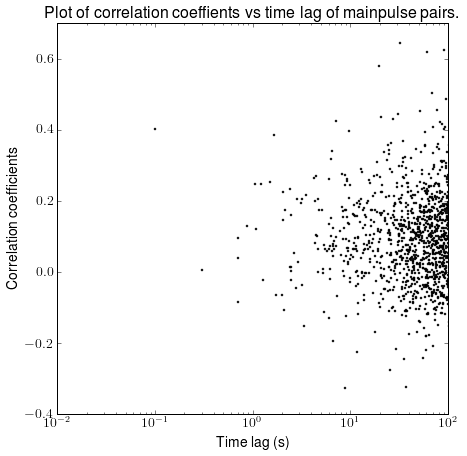

In [38]:
ctvalues = np.load('./figures/correlation_coeff/ctvalues_aug11_MP-MP-32-n.npy')
# np.save('./figures/correlation_coeff/{}_{}ctvaluesef_jul5.npy'.format(text_name,nchan),ctvalues)

figure(figsize = (10,10))
semilogx(ctvalues[:,1],ctvalues[:,0],'ok',markersize = 2)
xlabel('time lag(seconds)',fontsize = 12)
ylim(-1.,1)
ylabel('Correlation coefficient',fontsize = 12)
tick_params(axis='both', which='major', labelsize=14)

bin_no = 10
time_values = ctvalues[:,1]
cvalues = ctvalues[:,0]
time_values[np.isnan(cvalues)]=0
cvalues[np.isnan(cvalues)]=0
bins = np.logspace(-6,3,bin_no)
bin_means = np.histogram(time_values,bins,weights = cvalues,density = False)[0]/np.histogram(time_values,bins,density = False)[0]

figure(figsize = (7,7))
# semilogx((bins[:-1]+bins[1:])/2,bin_means,'-',label = 'averaged data points'.format(bin_no))
semilogx(time_values,cvalues,'ok',markersize = 2,label = 'correlation coefficients of MP-MP pairs')
# legend()
title('Plot of correlation coeffients vs time lag of mainpulse pairs.'.format(nchan),fontsize = 16)
xlabel('Time lag (s)',fontsize = 14)
ylim(-.4,.7)
xlim(0.01,100)
ylabel('Correlation coefficients',fontsize=14)
tick_params(axis='both', which='major', labelsize=14)


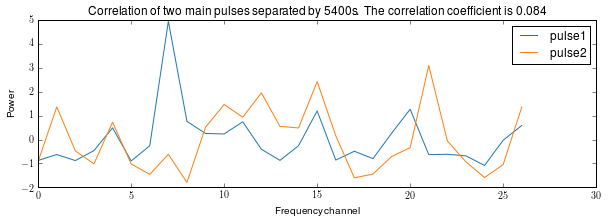

In [8]:
figure(figsize = (10,3))
plot(fgp1[0]/fgp1[0].mean()-1.,label = 'pulse1',color = colors[0])
plot(fgp2[0]/fgp2[0].mean()-1.,label = 'pulse2',color = colors[1])
# plot(fgp3[0]/fgp3[0].mean()-1.,label = 'jb',color = colors[2])
legend()
# title('Correlation of a pulse at wb(S/N = {}), ef(S/N = {}) and jb(S/N = {}). \n The correlation coefficient calculated for the 1st band is {}(ef-jb), {}(ef-wb), {}(wb-jb)'.format(round(sn1,3),round(sn2,3),round(sn3,3),round(ccs23[0],3),round(ccs12[0],3),round(ccs13[0],3)))
title('Correlation of two main pulses separated by 5400s. The correlation coefficient is {}'.format(round(ccs[0],3)))
xlabel('Frequency channel')
ylabel('Power')

In [14]:
t_dp1 = '2015-10-19T02:06:58.031' # double pulse
t_dp2 = '2015-10-19T00:54:59.880' # bright double pulse
t_dp3 = '2015-10-19T02:36:46.815'# bright double pulse2

In [16]:
def get_output_from_dchan(gp1s,nchan):
    gp1t = np.fft.irfft(gp1s,axis=1)
    gp1s = gp1t.reshape(-1,2*nchan,16)
    gp1s = np.fft.rfft(gp1s,axis=1)
    dchan = gp1s
    dR = np.concatenate((dchan[:,::-1,8], dchan[...,0], dchan[:,::-1,10], dchan[...,2], dchan[:,::-1,12], dchan[...,4], dchan[:,::-1,14], dchan[...,6]), axis=1)
    dL = np.concatenate((dchan[:,::-1,9], dchan[...,1], dchan[:,::-1,11], dchan[...,3], dchan[:,::-1,13], dchan[...,5], dchan[:,::-1,15], dchan[...,7]), axis=1)
    output = (abs(dR)**2 + abs(dL)**2).T
    return output

In [89]:
nchan=16

(64, 129, 16)
(64, 129, 16)
(264, 256)


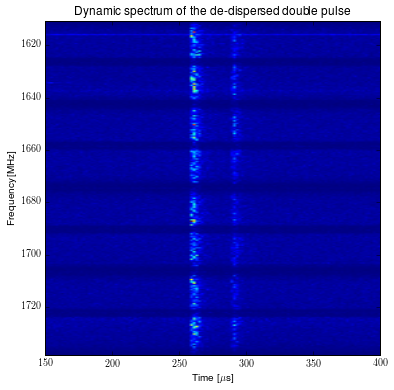

In [46]:
output = np.load('/mnt/raid-cita/xzxu/GPs/GPp1-{}/p{}.npy'.format(nchan,t_dp2))
output1 = np.load('/mnt/raid-cita/xzxu/GPs/GPef/p{}.npy'.format(t_dp2))
output2 = np.load('/mnt/raid-cita/xzxu/GPs/GPjb/p{}.npy'.format(t_dp2))
print output1.shape
print output2.shape
output1 = get_output_from_dchan(output1,nchan)
output2 = get_output_from_dchan(output2,nchan)
figure(figsize = (6,6))
imshow(output,aspect = 'auto',extent=(0,256*2,1610.49+16*8,1610.49))
title('Dynamic spectrum of the de-dispersed double pulse')
xlabel('Time [$\mu$s]')
ylabel('Frequency [MHz]')
xlim(150,400)
print output.shape
# xlabel(time(microseconds))
# ylabel(Frequency)

10.7230936232


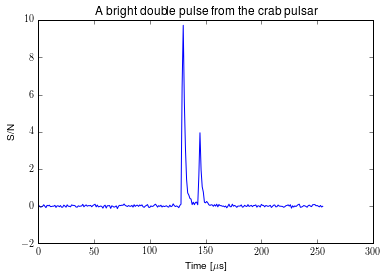

In [47]:
outputsumfreq = output1.sum(0) 
#computes signal to noise after summing all the frequencies
sigs_noise = get_SN(outputsumfreq)

peak_time = np.argmax(sigs_noise)
S_N = outputsumfreq[peak_time]/np.mean(outputsumfreq[:5])

sn_sorted = np.argsort(sigs_noise)
print S_N 
# print sn_sorted
plot(sigs_noise)
# xlim(220,320)
xlabel('Time [$\mu$s]')
ylabel('S/N')
title('A bright double pulse from the crab pulsar')



0.191654162275


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


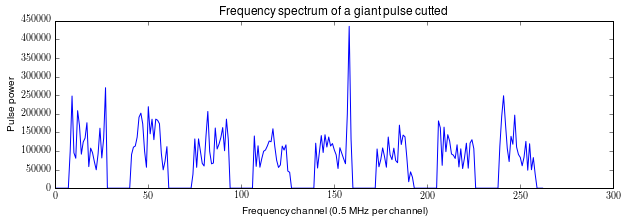

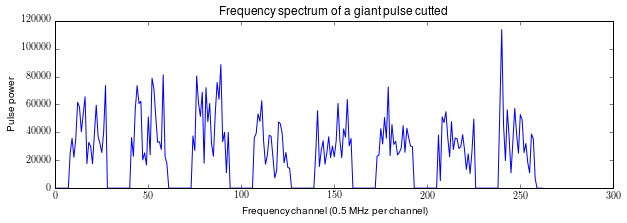

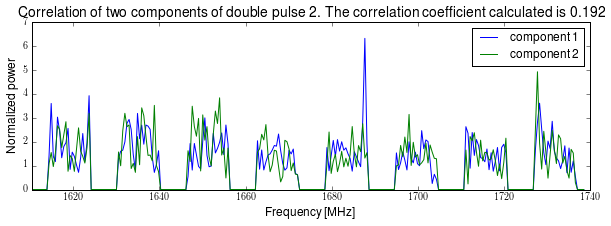

In [48]:
background_freq1= output[:,31:35].sum(1)
background_freq2 = output[:,31:35].sum(1)
output_pulse1 = output[:,129:133].sum(1) - background_freq1
output_pulse2 = output[:,144:148].sum(1) - background_freq2

# background_c = background_freq1[lower/512.*nchan:upper/512.*nchan]
# for j in range(1,8):
#     background_c = np.concatenate((background_c,background_freq1[j*(nchan+1)+lower/512.*nchan:j*(nchan+1)+upper/512.*nchan]),axis = 0)
background_std1 = np.std(background_freq1)
background_std2 = np.std(background_freq2)
fgp1,fgp1s = process_freq_spec(output_pulse1,nchan,draw = 1)
fgp2,fgp2s = process_freq_spec(output_pulse2,nchan,draw = 1)
cc = get_cc((fgp1s,background_std1),(fgp2s,background_std2))
print cc
figure(figsize = (10,3))
# plot(np.linspace(1610.5,1610.5+16*8,len(fgp1)),fgp1/np.mean(fgp1),label = 'ef')
# plot(np.linspace(1610.5,1610.5+16*8,len(fgp2)),fgp2/np.mean(fgp2),label = 'jb')
plot(np.linspace(1610.5,1610.5+16*8,len(fgp1)),fgp1/fgp1.mean(),label = 'component 1')
plot(np.linspace(1610.5,1610.5+16*8,len(fgp2)),fgp2/fgp2.mean(),label = 'component 2')
# title('The first component of double pulse 2 at Effelsberg and Jordrell Bank. \n The correlation coefficient calculated is {}'.format(round(cc,3)),fontsize = 14)
title('Correlation of two components of double pulse 2. The correlation coefficient calculated is {}'.format(round(cc,3)),fontsize = 14)
# title('Frequency spectrum of the 1st component of the double pulse cutted and stitched')
xlabel('Frequency [MHz]',fontsize = 12)
ylabel('Normalized power',fontsize = 12)
xlim(1610.5,1740)
# legend(loc = (1,0.6))
legend()

In [84]:
print np.std(fgp1/fgp1.mean())
print np.std(fgp2/fgp2.mean())

0.471371103449
0.482300734111


In [29]:
ctvalues=np.append(ctvalues,dpvalues,axis = 0)

In [12]:
# dpvalues= np.zeros((0,2))
dpvalues = np.append(dpvalues,np.array([[cc,30e-6]]),axis = 0)


In [13]:
dpvalues = np.load('./figures/correlation_coeff/dpvalues-32-n.npy')

In [223]:
np.save('./figures/correlation_coeff/dpvalues-32-n.npy',dpvalues)